In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2476, done.
remote: Counting objects: 100% (2476/2476), done.
remote: Compressing objects: 100% (2040/2040), done.
remote: Total 2476 (delta 617), reused 1340 (delta 407), pack-reused 0
Receiving objects: 100% (2476/2476), 30.86 MiB | 38.12 MiB/s, done.
Resolving deltas: 100% (617/617), done.


In [3]:
# Install the Object Detection API
%%bash
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1630675 sha256=f93674644fa176987d0785c4f8bde2103668cf3cfc4b0ba8fda6fc47dc67871f
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6hvica_/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [4]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [5]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2021-03-28 23:13:56.216290: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-03-28 23:13:58.508365: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-28 23:13:58.509360: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-28 23:13:58.575920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-28 23:13:58.576492: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB devi

In [6]:

#Downloading data Training set made by Roboflow
%cd /content

#Download Training set from git by cloning rep:
import os
import pathlib

# Clone the training set repository if it doesn't already exist
if "ECE209AS-AI-ML_CPS-IoT" in pathlib.Path.cwd().parts:
  while "ECE209AS-AI-ML_CPS-IoT" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('ECE209AS-AI-ML_CPS-IoT').exists():
  !git clone --depth 1 https://github.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT
  %cd /content/ECE209AS-AI-ML_CPS-IoT/Training_Set 
  !unzip Video_1.v1-train_vid_1.tfrecord.zip -d /content/
  %cd /content/ECE209AS-AI-ML_CPS-IoT/Test_Set 
  !unzip Test_Vid_1.v1yyyy-test_vid_1.tfrecord.zip -d /content/

#NOTE: Update these TFRecord names to your files containing training set!
#Also, Update relevant rows:in training config file "ssd_mobilenet_v2_320x320_coco17_tpu-8.config"
#label_map_path,input_path 

test_record_fname = '/content/test/Objects.tfrecord'
train_record_fname = '/content/train/Objects.tfrecord'
label_map_pbtxt_fname = '/content/train/Objects_label_map.pbtxt'


/content
Cloning into 'ECE209AS-AI-ML_CPS-IoT'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 3), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.
/content/ECE209AS-AI-ML_CPS-IoT/Training_Set
Archive:  Video_1.v1-train_vid_1.tfrecord.zip
 extracting: /content/README.roboflow.txt  
   creating: /content/train/
 extracting: /content/train/Objects.tfrecord  
 extracting: /content/train/Objects_label_map.pbtxt  
/content/ECE209AS-AI-ML_CPS-IoT/Test_Set
unzip:  cannot find or open Test_Vid_1.v1yyyy-test_vid_1.tfrecord.zip, Test_Vid_1.v1yyyy-test_vid_1.tfrecord.zip.zip or Test_Vid_1.v1yyyy-test_vid_1.tfrecord.zip.ZIP.


In [7]:
#Downloading data Training set made by Roboflow
%cd /content

#Download Training set from git by cloning rep:
import os
import pathlib
# Clone the training set repository if it doesn't already exist
if "ECE209AS-AI-ML_CPS-IoT" in pathlib.Path.cwd().parts:
  while "ECE209AS-AI-ML_CPS-IoT" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('ECE209AS-AI-ML_CPS-IoT').exists():
  !git clone --depth 1 https://github.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT
  %cp -avr /content/ECE209AS-AI-ML_CPS-IoT/train /content
  %cp -avr /content/ECE209AS-AI-ML_CPS-IoT/test /content
  

#NOTE: Update these TFRecord names to your files containing training set!
#Also, Update relevant rows:in training config file "ssd_mobilenet_v2_320x320_coco17_tpu-8.config"
#label_map_path,input_path 
test_record_fname = '/content/test/Objects.tfrecord'
train_record_fname = '/content/train/Objects.tfrecord'
label_map_pbtxt_fname = '/content/train/Objects_label_map.pbtxt'

/content


In [8]:
#You can change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'ssd_mobilenet_v2_320x320_coco17': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz',
        'batch_size': 16
    }
}
chosen_model = 'ssd_mobilenet_v2_320x320_coco17'
num_steps = 1800 #40000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps
model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your trainin#g

In [9]:
#Download pretrained weights
%mkdir /content/deploy/
%cd /content/deploy/
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()
#Shorten the folder name,because long file paths are not yet supported :(
os.rename('ssd_mobilenet_v2_320x320_coco17_tpu-8','mobilnetv2')

/content/deploy
--2021-03-28 23:15:09--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:82a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M   230MB/s    in 0.2s    

2021-03-28 23:15:10 (230 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [10]:
#Download training configuration file for mobilenetV2. 
#note: configuration file contain references to your trainig set of images,
#you can change it for your dataset.
%cd /content/deploy
download_config = 'https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
!wget {download_config}

#Prepare frozen model for retraining
fine_tune_checkpoint = '/content/deploy/mobilnetv2/checkpoint/ckpt-0'
pipeline_file = '/content/deploy/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
model_dir = '/content/training/'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)

/content/deploy
--2021-03-28 23:15:18--  https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4566 (4.5K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’

ssd_mobilenet_v2_32 100%[===================>]   4.46K  --.-KB/s    in 0s      

2021-03-28 23:15:18 (80.7 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’ saved [4566/4566]



In [ ]:
#Download training configuration file for mobilenetV2. 
#note: configuration file contain references to your trainig set of images,
#you can change it for your dataset.
%cd /content/deploy
download_config = 'https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
!wget {download_config}

/content/deploy
--2021-03-28 22:47:15--  https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4566 (4.5K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’

ssd_mobilenet_v2_32 100%[===================>]   4.46K  --.-KB/s    in 0s      

2021-03-28 22:47:15 (32.9 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’ saved [4566/4566]



In [ ]:
#Prepare loaded model for retraining
fine_tune_checkpoint = '/content/deploy/mobilnetv2/checkpoint/ckpt-0'
pipeline_file = '/content/deploy/ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
model_dir = '/content/training/'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)

In [11]:
#Check if all configuration is OK:
print(fine_tune_checkpoint)
print(train_record_fname)
print(label_map_pbtxt_fname)
print(batch_size)
print(num_steps)
print(num_classes)
print(pipeline_file)
print(model_dir)

/content/deploy/mobilnetv2/checkpoint/ckpt-0
/content/train/Objects.tfrecord
/content/train/Objects_label_map.pbtxt
16
1800
3
/content/deploy/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
/content/training/


In [12]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2021-03-28 23:15:35.219955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-28 23:15:37.513517: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-28 23:15:37.514435: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-28 23:15:37.547178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-28 23:15:37.547788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-28 23:15:37.547825: I tensorflow/stream_executor/platform/default/dso_loade

In [13]:
#Your trained weights will be in this directory:
%ls -l '/content/training/'

total 54936
-rw-r--r-- 1 root root      255 Mar 28 23:21 checkpoint
-rw-r--r-- 1 root root 18780069 Mar 28 23:16 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 root root    22266 Mar 28 23:16 ckpt-1.index
-rw-r--r-- 1 root root 37392549 Mar 28 23:21 ckpt-2.data-00000-of-00001
-rw-r--r-- 1 root root    41646 Mar 28 23:21 ckpt-2.index
drwxr-xr-x 2 root root     4096 Mar 28 23:15 train/


In [14]:
#Run conversion script to save the retrained model:
#Saved model will be in saved_model.pb file:

import re
import numpy as np

output_directory = '/content/fine_tuned_model'

#place the model weights you would like to export here
last_model_path = '/content/training/'
print(last_model_path)
!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/content/training/
2021-03-28 23:25:23.879178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-28 23:25:25.942410: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-28 23:25:25.943370: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-28 23:25:25.978649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-28 23:25:25.979471: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-28 23:25:25.979533: I tensorflow/stream_executor/platfor

In [16]:
%ls '/content/fine_tuned_model/saved_model/'

assets/  saved_model.pb  variables/


In [18]:
%mkdir /content/test
%cd /content/test
d_image = 'https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/test.jpg'
!wget {d_image}

/content/test
--2021-03-28 23:26:32--  https://raw.githubusercontent.com/Riyya-HI/ECE209AS-AI-ML_CPS-IoT/main/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338089 (330K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 330.17K  --.-KB/s    in 0.006s  

2021-03-28 23:26:32 (54.0 MB/s) - ‘test.jpg’ saved [338089/338089]



In [19]:
import os 
import glob
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [20]:
#Recover our saved model with the latest checkpoint:
pipeline_config = pipeline_file
#Put the last ckpt from training in here, don't use long pathnames:
model_dir = '/content/training/ckpt-2'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore last checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
#ckpt.restore(os.path.join(model_dir))
ckpt.restore(model_dir)

#Function perform detection of the object on image in tensor format: 
def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""
    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn
  
#Define function which performs detection: 
detect_fn = get_model_detection_function(detection_model)

In [21]:
#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


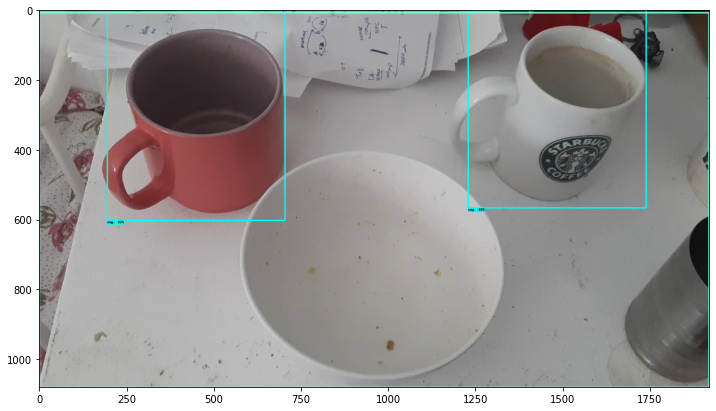

In [22]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random

#Define utility functions for presenting the results:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.
  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.
  Args:
    path: the file path to the image
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


#Place your test images here:
image_path = '/content/test/test.jpg'

#Store test images in nmpy array:
image_np = load_image_into_numpy_array(image_path)

#Convert images to tensor form:
input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)

#Perform detection on the image in tensor format:
detections, predictions_dict, shapes = detect_fn(input_tensor)

#Visualize the detection boxes on the image:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.70,#0.5,#0.5
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

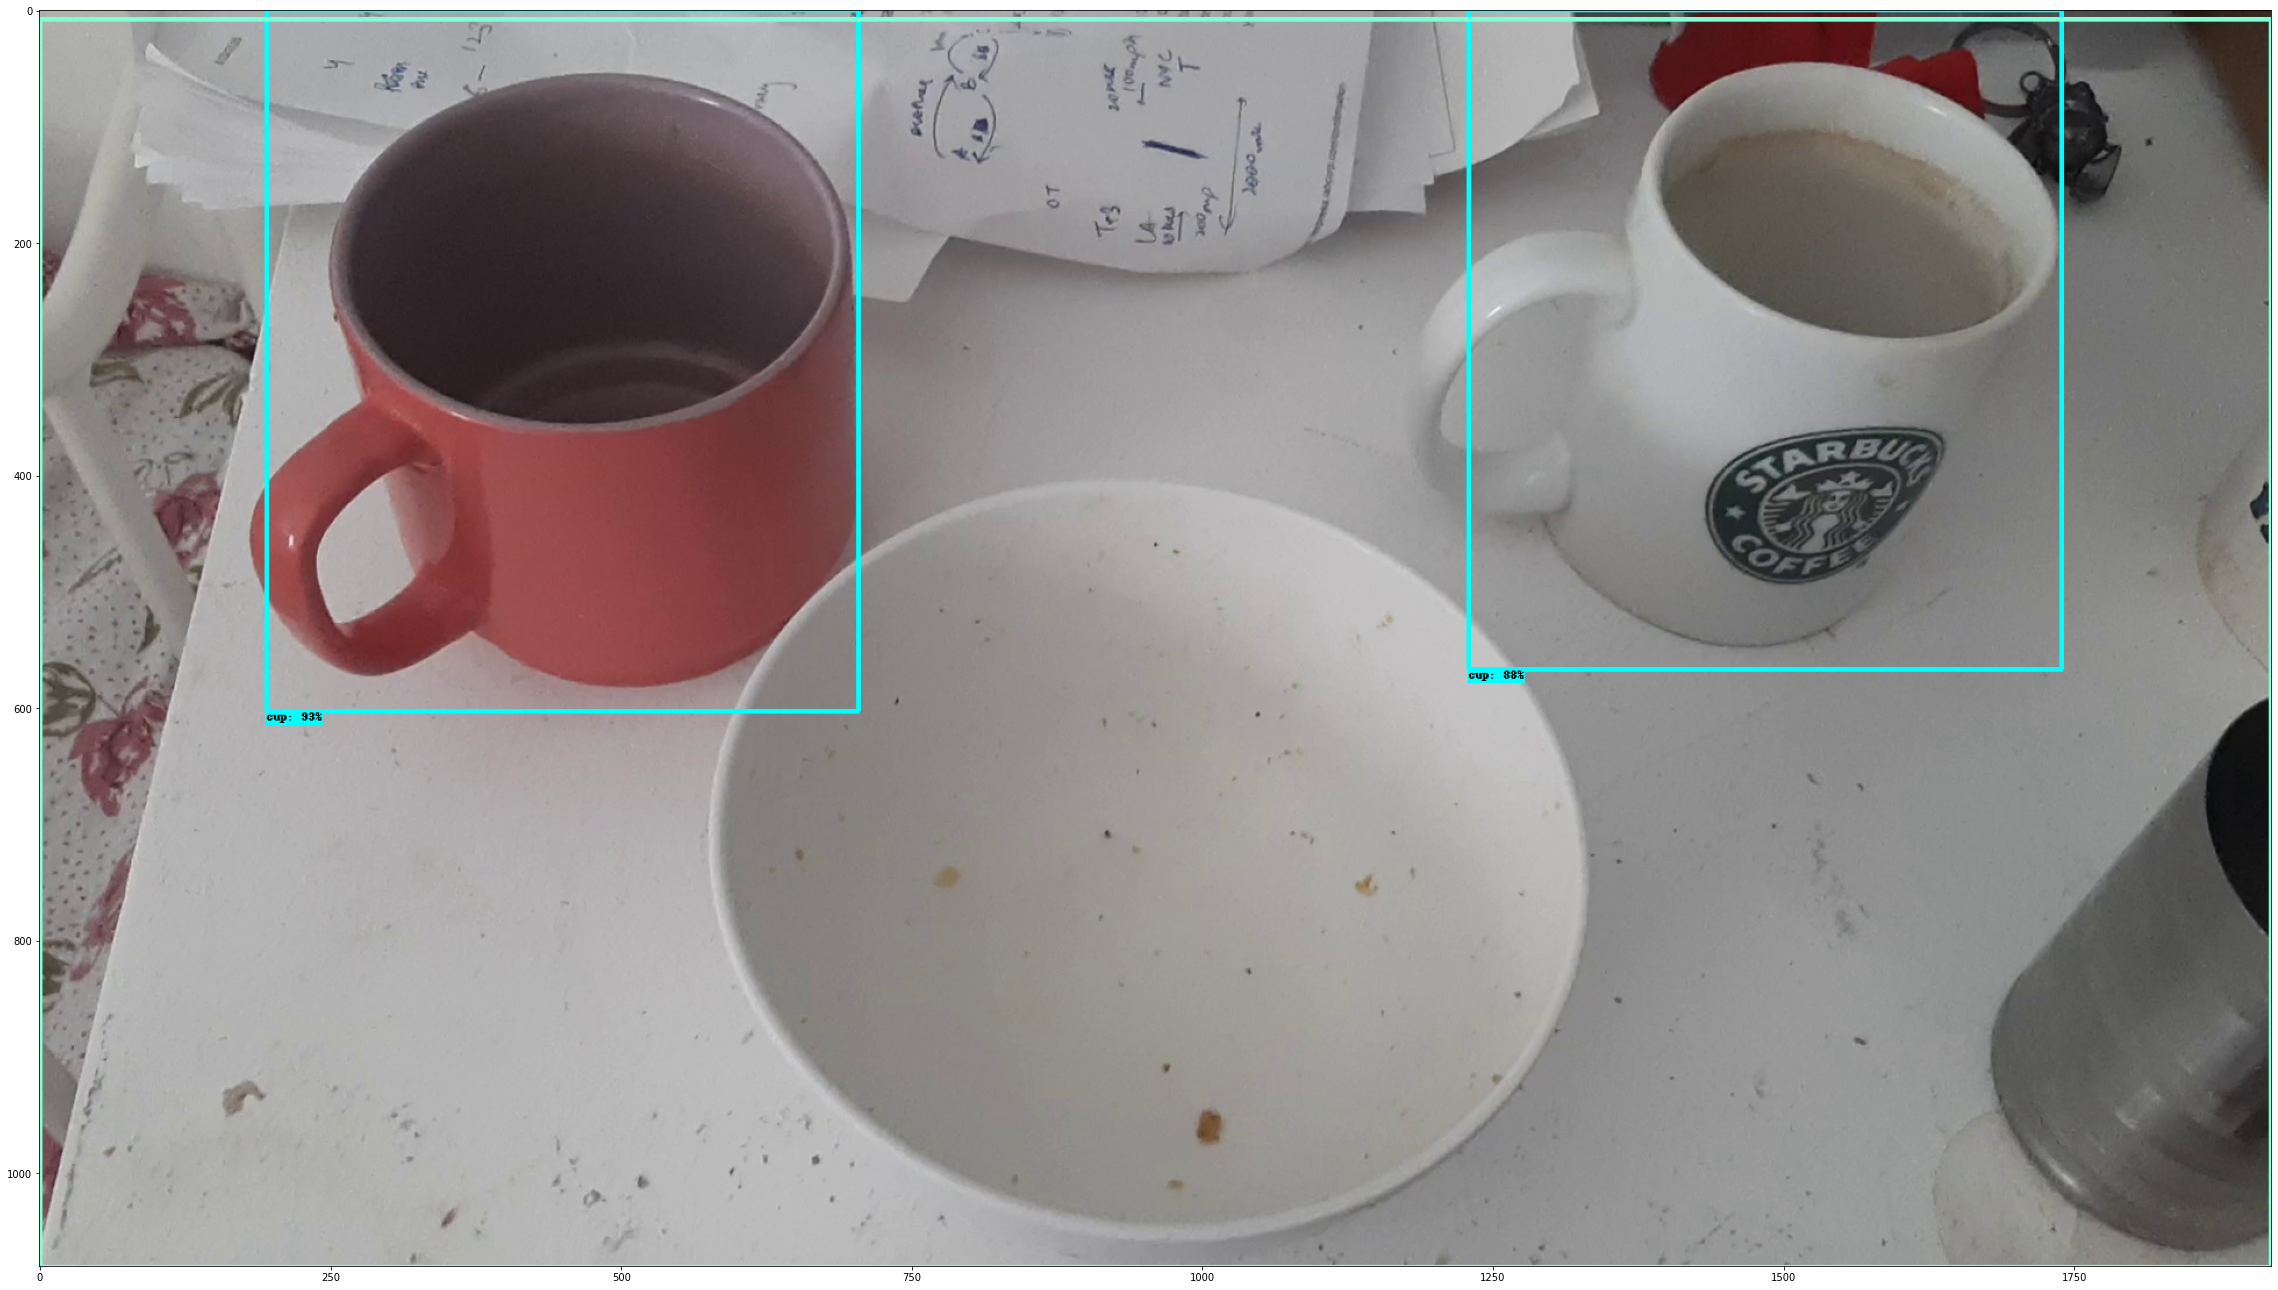

In [24]:
plt.figure(figsize=(40,48))
plt.imshow(image_np_with_detections)
plt.show()